# *DATA SCIENCE ENGINEERING FINAL PROJECT*


    
***


## <p>Group 3:</p>

<pre><code>
            DEEPTI AKARSHA                   NUID:001563284
            GARIMA CHOUDHARY                 NUID:002104897
            SHEMAL SHAH                      NUID:002191824 
</code></pre> 



## Our final project is based on COP26 
COP26 was the 2021 United Nations climate change conference

For nearly three decades the UN has been bringing together almost every country on earth for global climate summits – called COPs – which stands for ‘Conference of the Parties’. In that time climate change has gone from being a fringe issue to a global priority.

This year was the 26th annual summit – giving it the name COP26. 

<!-- <img src='C:\Users\riaka\Downloads\GroupProject3\untitled folder\untitled folder\untitled folder\59733743_6.jpeg' width="400"> -->
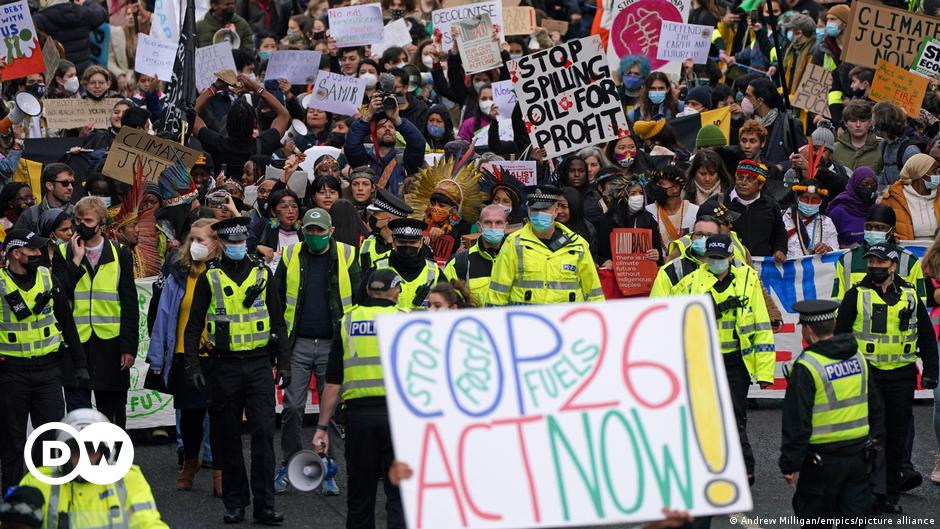


# Now lets see the MAIN Goal of COP26:

### Secure global net zero by mid-century and keep 1.5 degrees within reach
Countries are being asked to come forward with ambitious 2030 emissions reductions targets that align with reaching net zero by the middle of the century.




### Okay so now we know the goals 
### lets find the one of the biggest reason of rise in temp?

# GREENHOUSE GAS


So what does greenhouse gas do?

The greenhouse effect is the way in which heat is trapped close to Earth's surface by “greenhouse gases.” 
These heat-trapping gases can be thought of as a blanket wrapped around Earth, keeping the planet toastier than it would be without them

<!-- <img src="C:\Users\riaka\Downloads\GroupProject3\untitled folder\untitled folder\gases-by-source-2021.png" width=300> -->
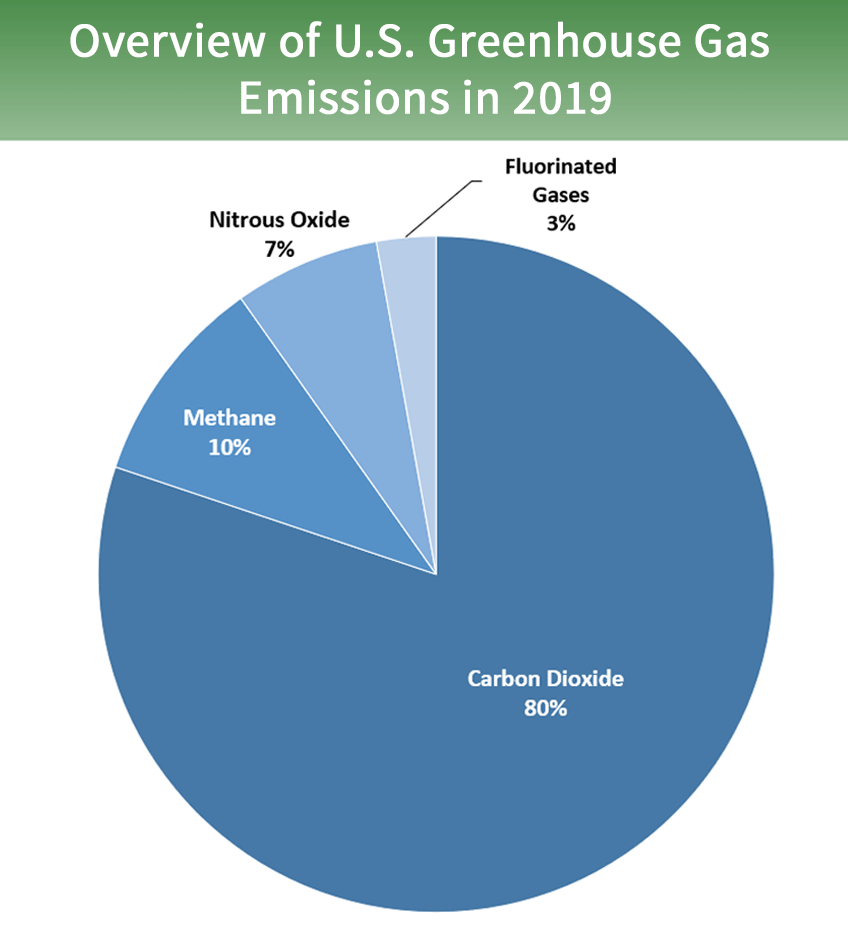
</center>



# 80% is CO2!!

## Looks like CO2 is is a big influencer for RISE IN TEMP 

<!-- <img src="untitled folder/images.jpeg" width=300 /> -->
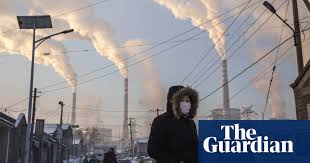

# Lets see how much CO2 is emmited 


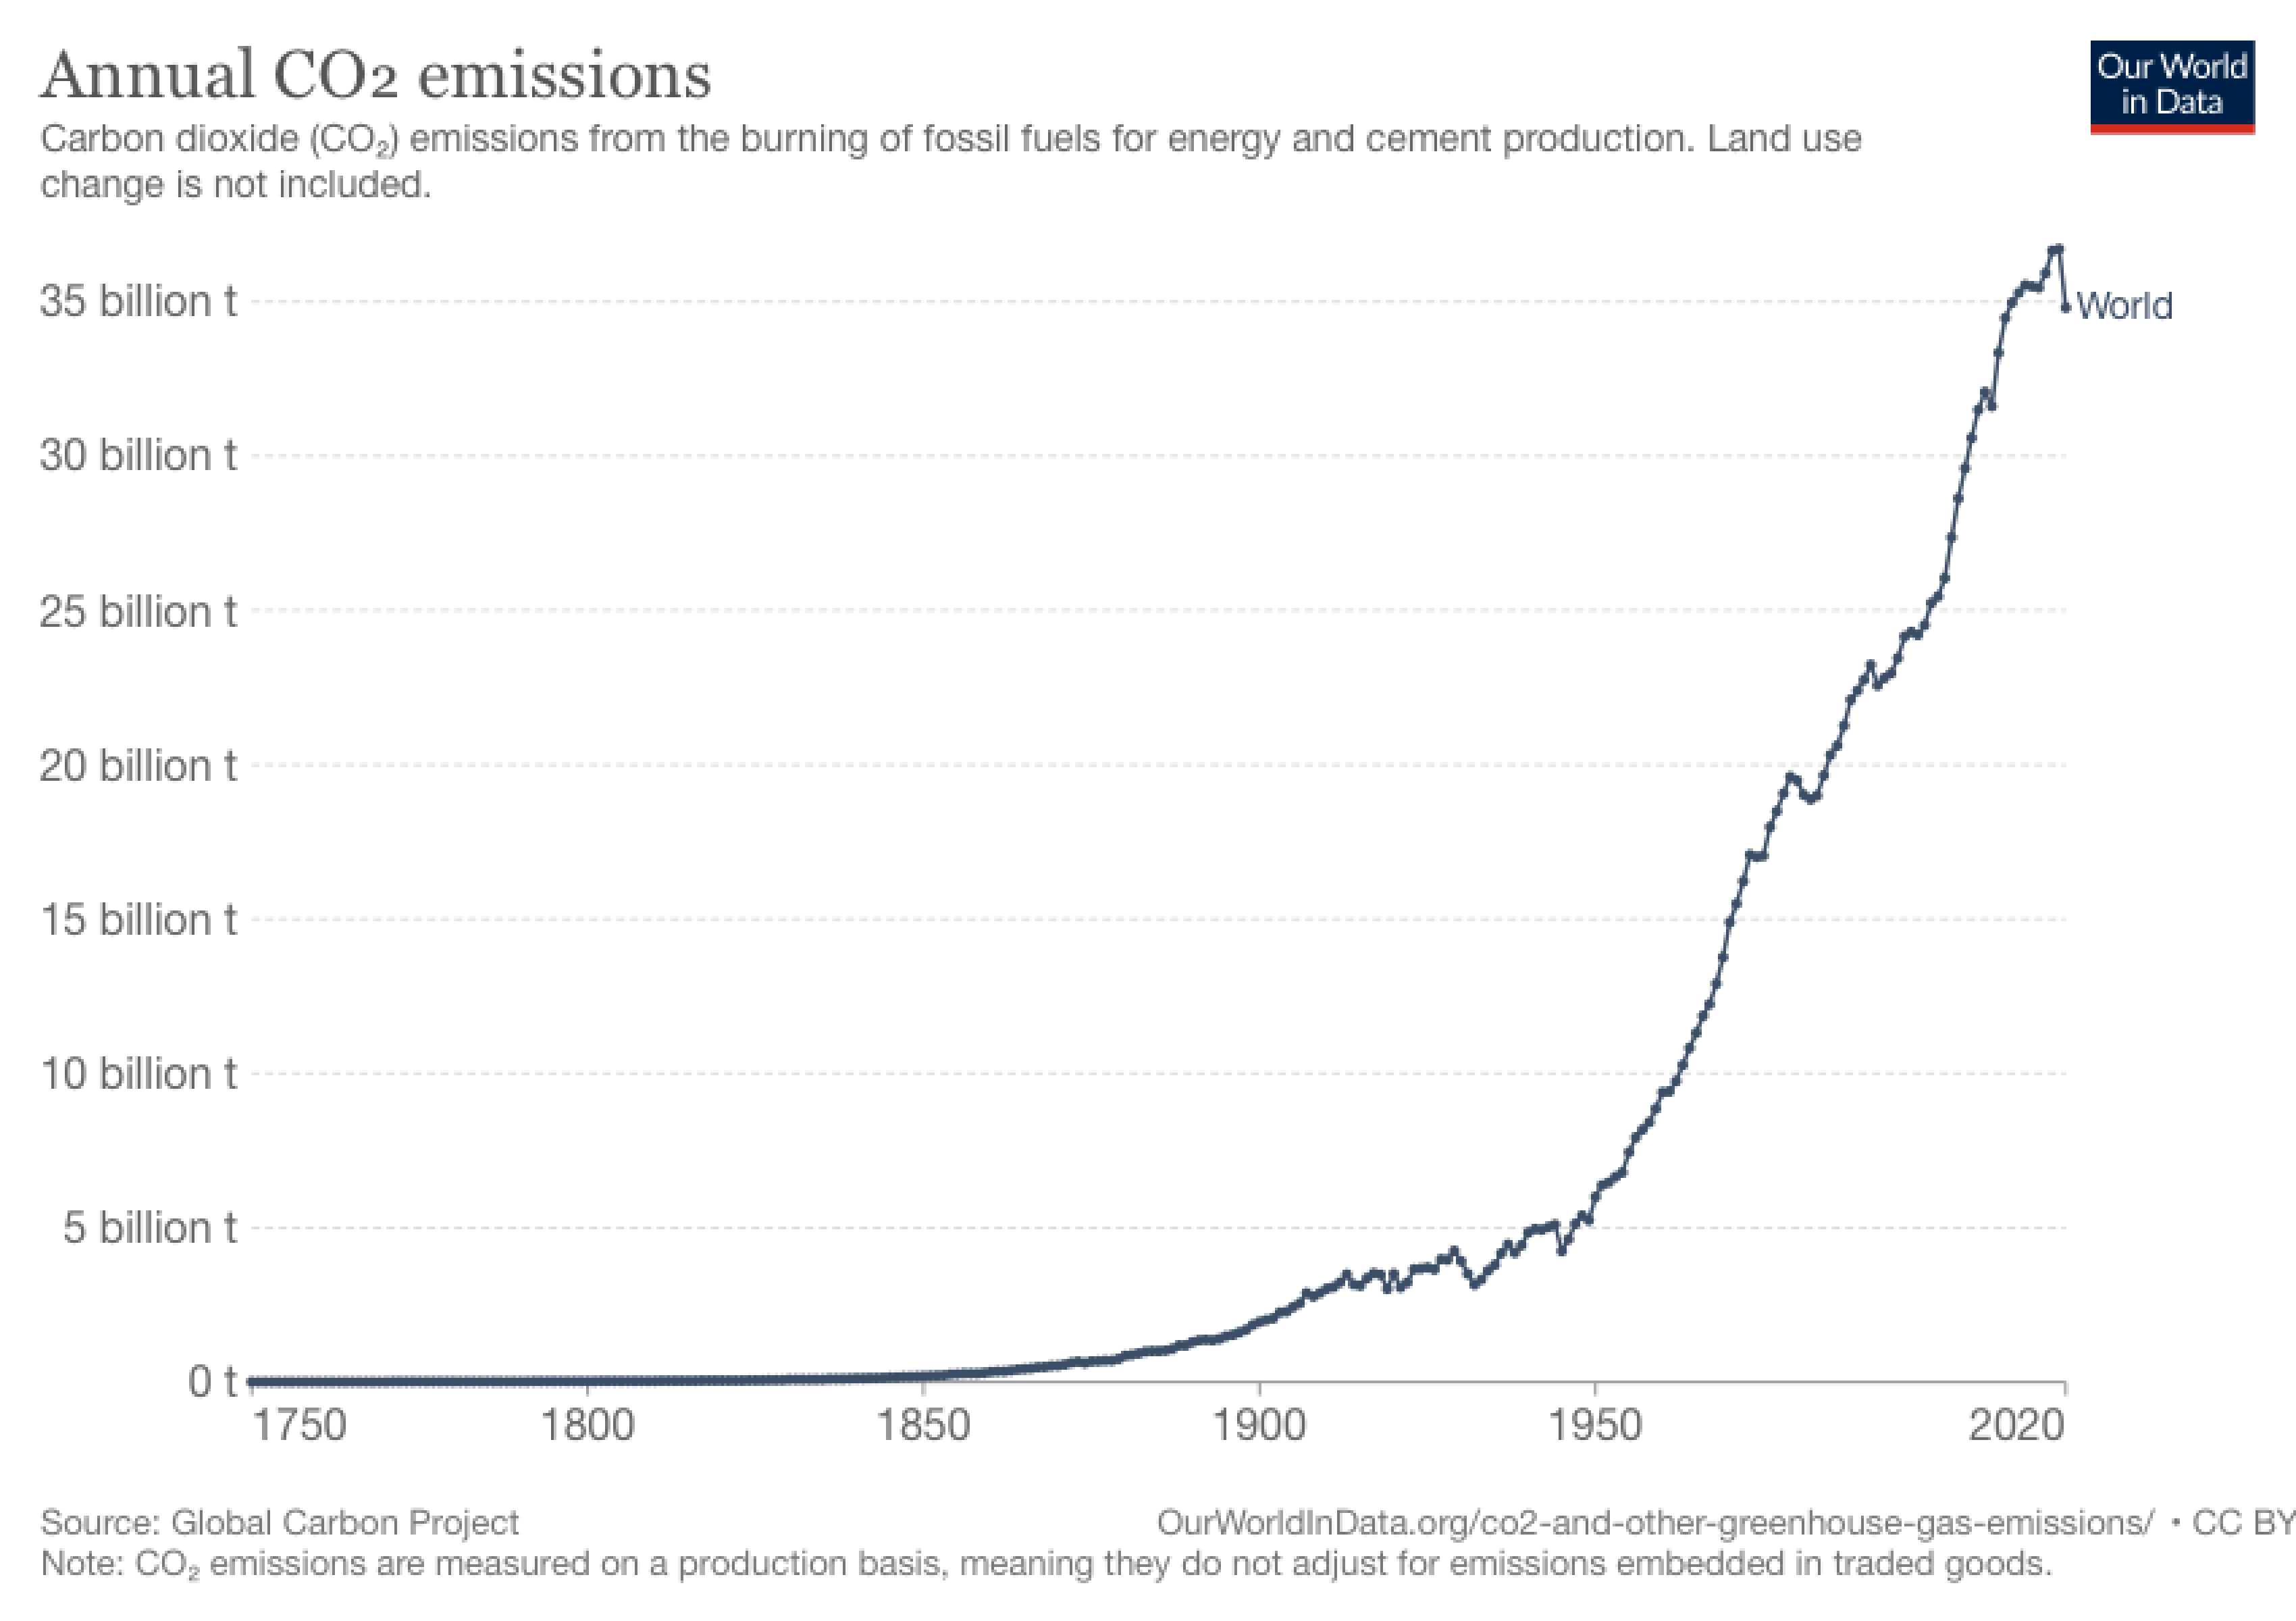
<!-- <img src="untitled folder/annual-co2-emissions-per-country.png" width=800 /> -->



## AND THE CHANGE IN TEMP

<!-- <img src="untitled folder/temperature-anomaly.png" width=800 /> -->

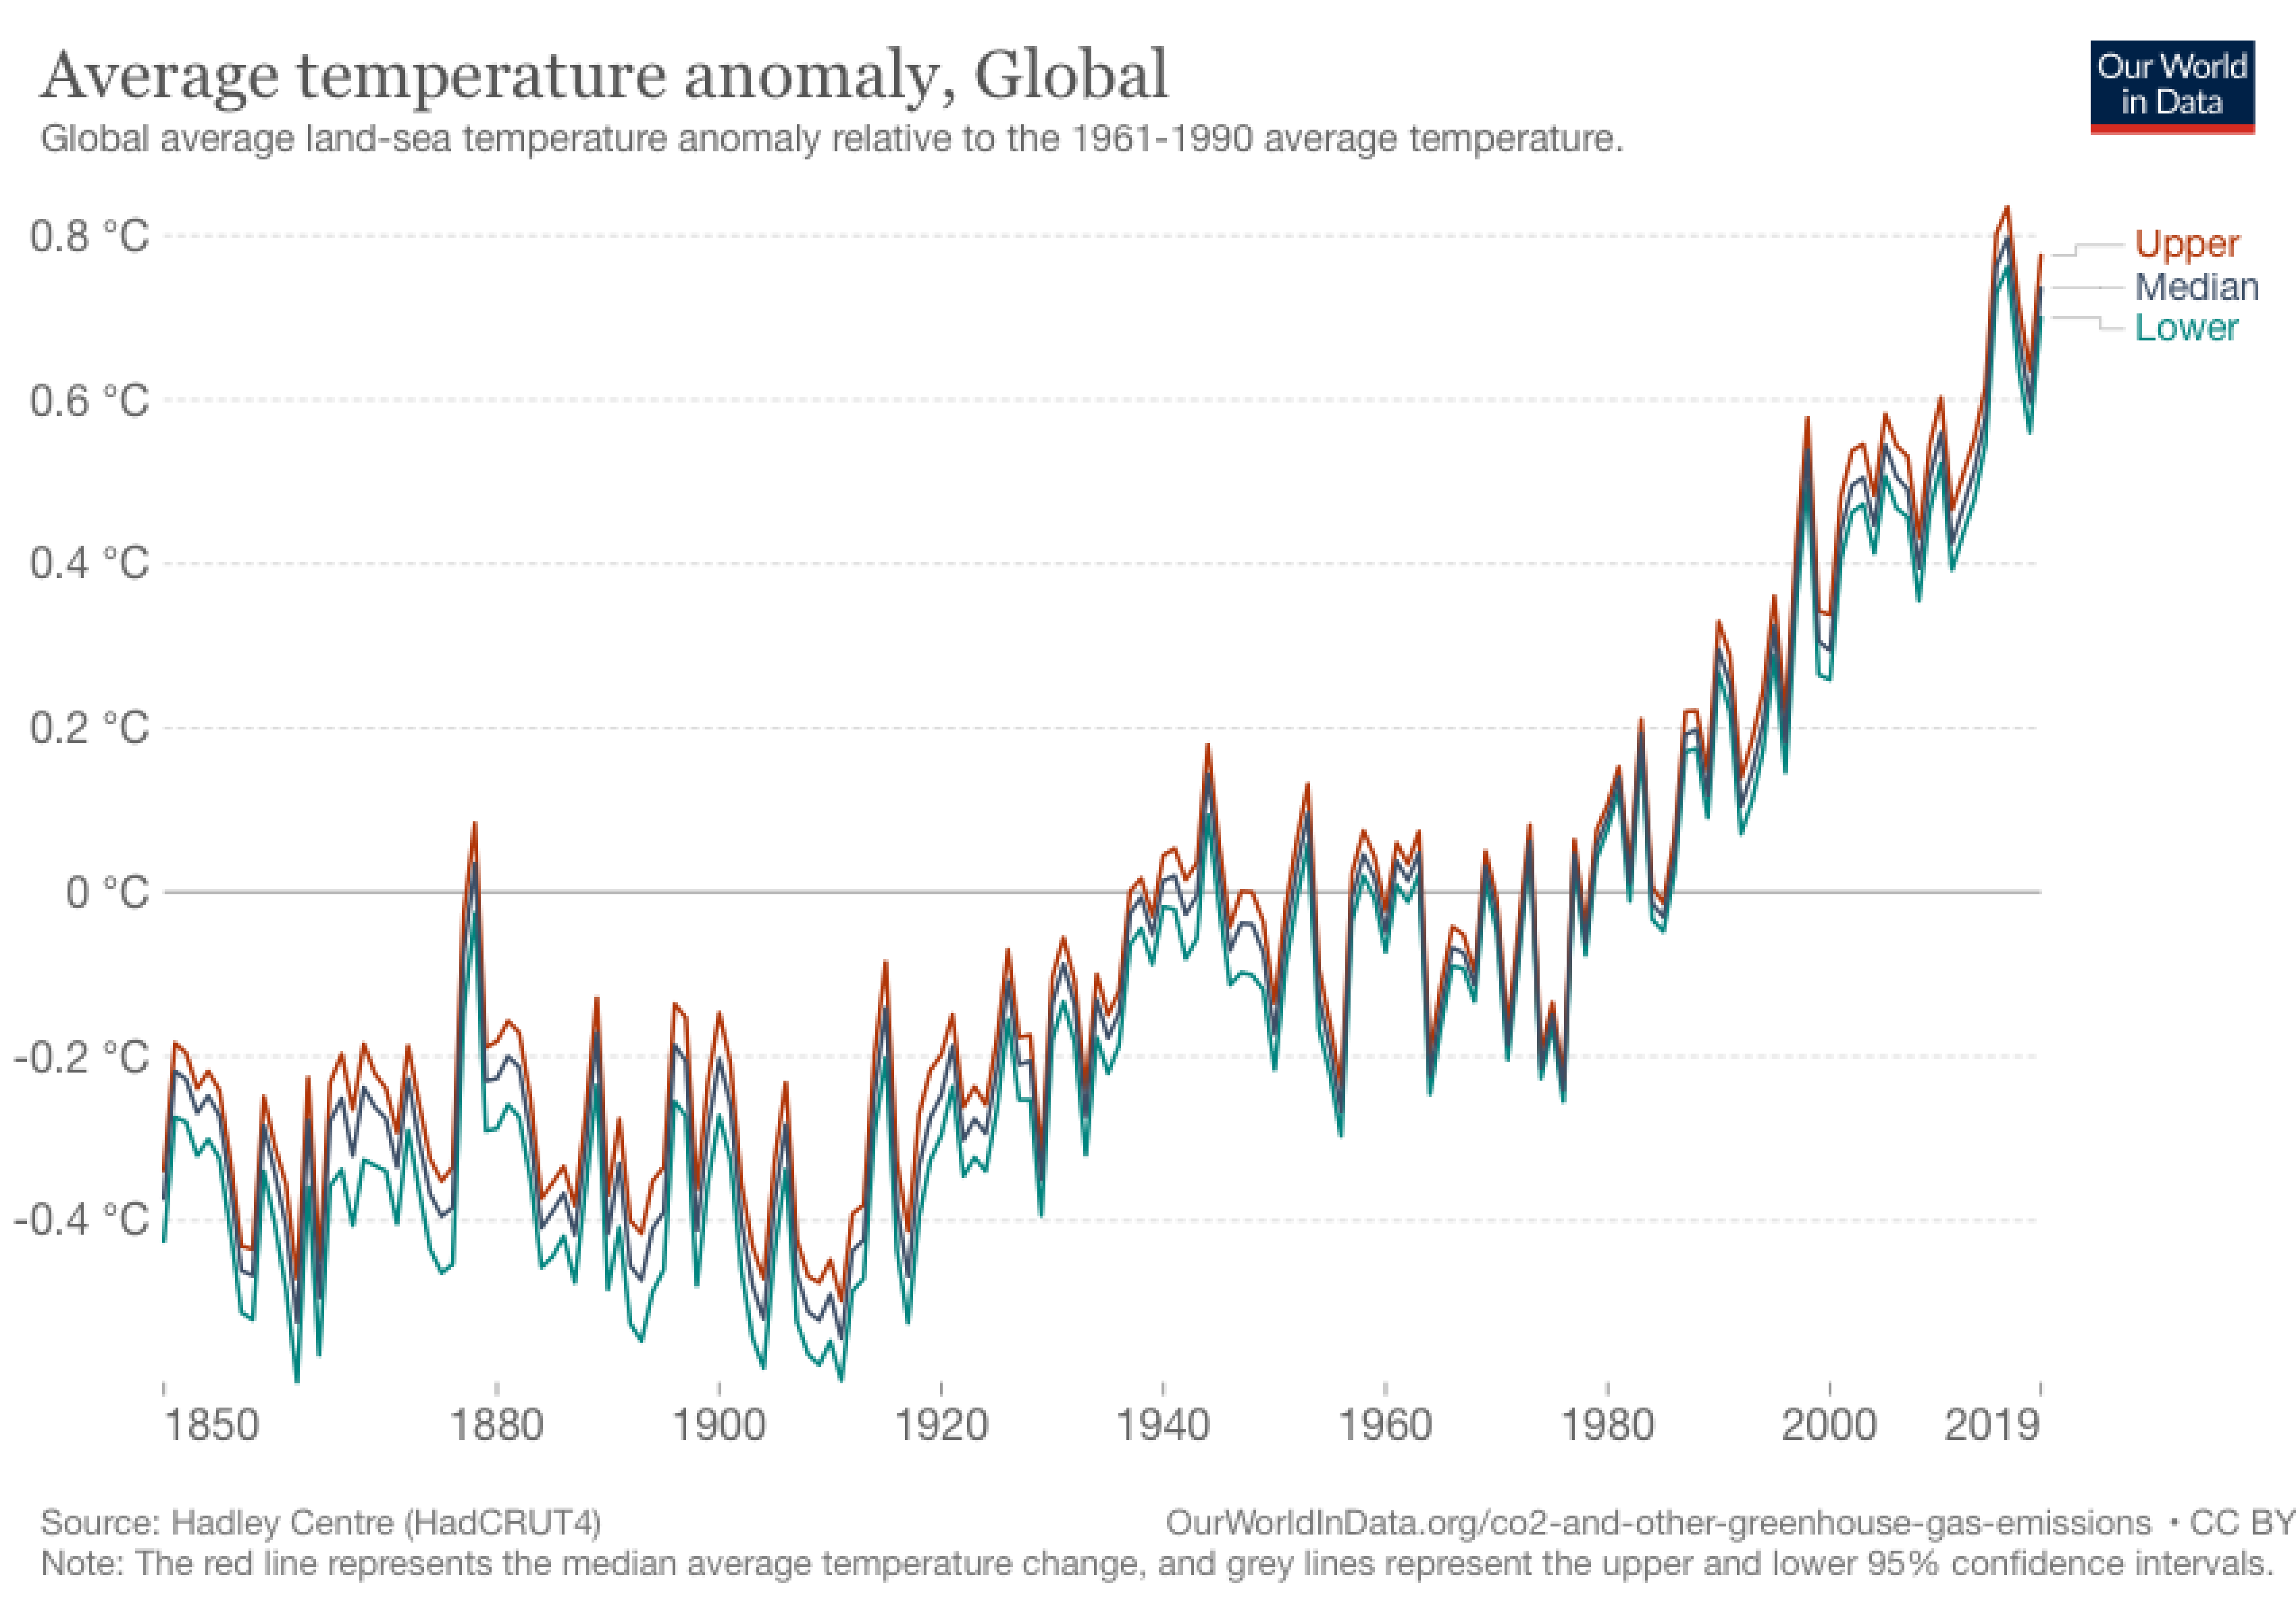


## SHOCKED RIGHT?
<!-- 
<img src="untitled folder/lft0it7mj4581.jpg" width=300 /> -->
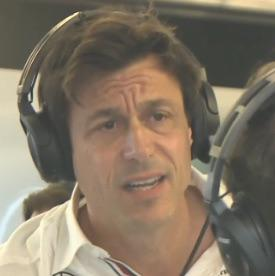


### EVERY YEAR ITS INCREASING AND INCREASING


## NOW LETS FIND SOME CO2 & TEMPERATURE DATASET 

<pre><code>
In the datset below :


We have BOSTON CO2 & TEMP data from 1980-2021
</code></pre> 



## IN THIS PROJECT:
1. We will predict co2  & temp values till 2030



2. With the predicted values we will know if we are going above or below 1.5 degrees discussed in COP 26 



3. The future co2 values will show us by how much we should to decrease the co2 emmisions if we go above the 1.5 degree mark 


# Installing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error as ms
%matplotlib inline

In [2]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression

In [3]:
data = pd.read_excel(r'C:\Users\riaka\Desktop\Northeastern\Class\Fall2021\DSEM\Project\Time-Series-Analysis-and-Weather-Forecast--master\Time-Series-Analysis-and-Weather-Forecast--master\Weather_data\data\co2+temp_data_.xlsx')
data.set_index("year", inplace = True)
data

,month,decimal,averageco2,trend,temp
year,,,,,
1980,1,1980.042,338.55,337.93,29.4
1980,2,1980.125,339.27,338.22,27.8
1980,3,1980.208,339.60,338.25,36.8
1980,4,1980.292,339.99,338.37,48.7
1980,5,1980.375,340.43,338.90,59.4
...,...,...,...,...,...
2021,5,2021.375,416.12,414.50,61.4
2021,6,2021.458,415.31,414.73,74.4
2021,7,2021.542,413.55,414.85,72.4





## Rename averagec02 to CO2

In [4]:
data.rename(columns = {'averageco2' : 'CO2'}, inplace = True)


## STATISTICAL ANALYSIS

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 501 entries, 1980 to 2021
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   month    501 non-null    int64  
 1   decimal  501 non-null    float64
 2   CO2      501 non-null    float64
 3   trend    501 non-null    float64
 4   temp     501 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 23.5 KB


In [6]:
data.describe()

,month,decimal,CO2,trend,temp
count,501.000000,501.000000,501.000000,501.000000,501.000000
mean,6.473054,2000.875000,372.299421,372.296966,51.997006
std,3.447575,12.064207,22.227090,22.191961,15.673994
min,1.000000,1980.042000,337.050000,337.930000,19.000000
25%,3.000000,1990.458000,354.000000,353.800000,37.600000
50%,6.000000,2000.875000,369.650000,369.450000,51.900000
75%,9.000000,2011.292000,389.980000,390.240000,67.100000
max,12.000000,2021.708000,416.120000,415.180000,78.700000


<AxesSubplot:xlabel='year'>

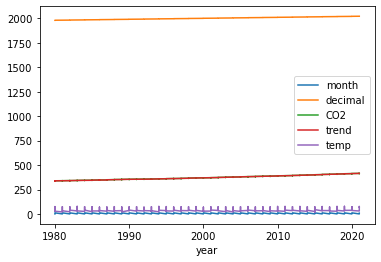

In [7]:
data.plot()

## LETS LOOK AT THE HISTOGRAM
A histogram is a graphical representation of the distribution of a dataset. Although its appearance is similar to that of a standard bar graph, instead of making comparisons between different items or categories or showing trends over time, a histogram is a plot that lets you show the underlying frequency distribution or the probability distribution of a single continuous numerical variable.

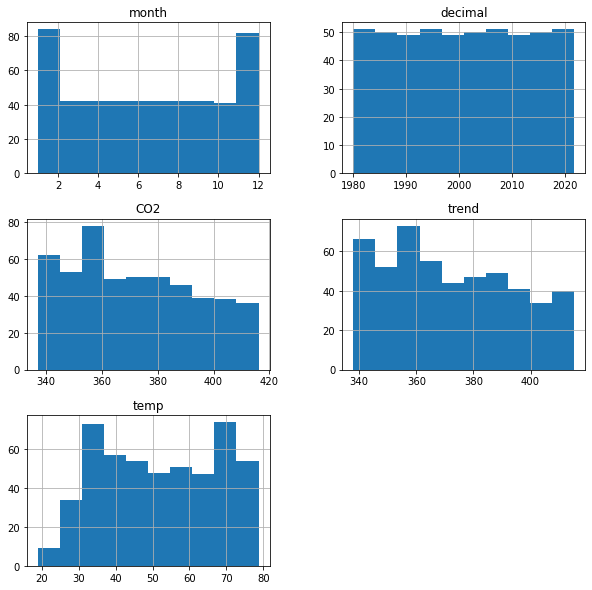

In [8]:
histdata = data.hist(bins=10, figsize = (10,10))

Text(0, 0.5, 'CO2')

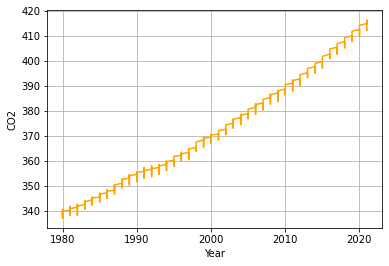

In [9]:
co2 = data['CO2']
co2.plot(color='Orange')
plt.grid(True)
plt.xlabel("Year")
plt.ylabel("CO2")

CO2 DATA IS INCREASING 

Text(0, 0.5, 'Temperature(in Fahrenheit)')

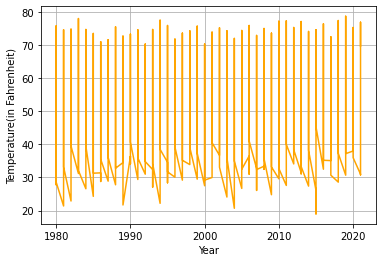

In [10]:
temp = data['temp']
temp.plot(color='Orange')
plt.grid(True)
plt.xlabel("Year")
plt.ylabel("Temperature(in Fahrenheit)")

AND TEMP IS ALSO INCREASING SEASONALLY

## CHECK NA VALUES

Missing data is a huge problem for data analysis because it distorts findings. It’s difficult to be fully confident in the insights when you know that some entries are missing values. Hence, they must be addressed.

When data is missing, it may make sense to delete data. However, that may not be the most effective option. For example, if too much information is discarded, it may not be possible to complete a reliable analysis. Or there may be insufficient data to generate a reliable prediction for observations that have missing data.

In [11]:
data.isna().sum()

month      0
decimal    0
CO2        0
trend      0
temp       0
dtype: int64

As we can see the sum of all NaN values for the variables in the dataframe is 0, representing no missing values in the dataframe


## Correlation Matrix

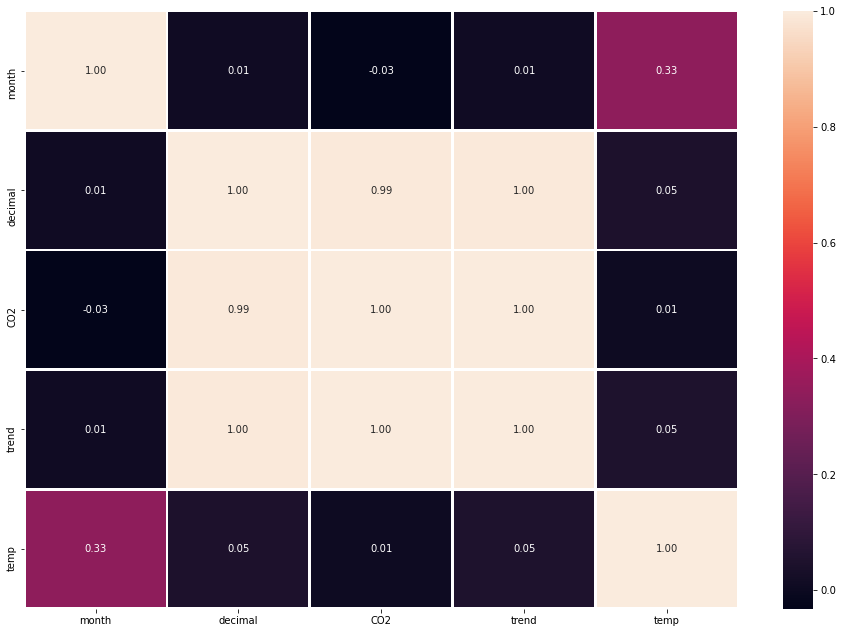

In [12]:
corr = data.corr()
f,ax = plt.subplots(figsize=(16,11))
sns.heatmap(corr, annot = True, linewidths=1.8 , fmt = '.2f',ax=ax)
plt.show()

## AFTER LOOKING AT THE HEAT MAP WE COME TO KNOW THE CO RELATION BETWEEN THE VARIABLES 

## SINCE TREND AND DECIMAL HAVE HIGHEST CO RELATION WITH OTHERS SO WE CAN DROP THEM

In [13]:
data.drop(columns=['trend','decimal'], inplace = True)

In [14]:
data

,month,CO2,temp
year,,,
1980,1,338.55,29.4
1980,2,339.27,27.8
1980,3,339.60,36.8
1980,4,339.99,48.7
1980,5,340.43,59.4
...,...,...,...
2021,5,416.12,61.4
2021,6,415.31,74.4
2021,7,413.55,72.4


## LETS FIND OUTLIERS WITH BOXPLOT




An outlier is an observation of a data point that lies an abnormal distance from other values in a given population. (odd man out)


Generally, Outliers affect statistical results while doing the EDA process, we could say a quick example is the MEAN and MODE of a given set of data set, which will be misleading that the data values would be higher than they really are.

{'whiskers': [<matplotlib.lines.Line2D at 0x1df34fc55b0>,
 'caps': [<matplotlib.lines.Line2D at 0x1df34fc5c70>,
 'boxes': [<matplotlib.lines.Line2D at 0x1df34fc5250>],
 'medians': [<matplotlib.lines.Line2D at 0x1df34fd2370>],
 'fliers': [<matplotlib.lines.Line2D at 0x1df34fd26d0>],
 'means': []}

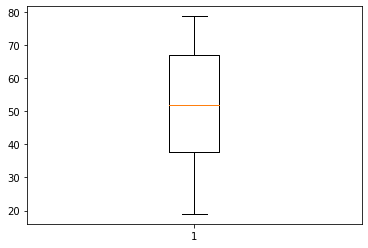

In [15]:
plt.boxplot(data.temp)

{'whiskers': [<matplotlib.lines.Line2D at 0x1df3520e190>,
 'caps': [<matplotlib.lines.Line2D at 0x1df3520e850>,
 'boxes': [<matplotlib.lines.Line2D at 0x1df3501de50>],
 'medians': [<matplotlib.lines.Line2D at 0x1df3520ef10>],
 'fliers': [<matplotlib.lines.Line2D at 0x1df352192b0>],
 'means': []}

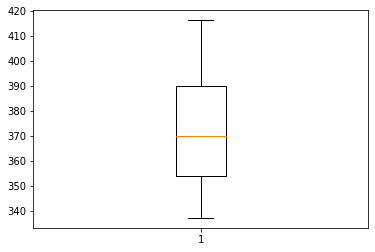

In [16]:
plt.boxplot(data.CO2)

## PHEW. 
## THAT'S SOME NICE DATA!!

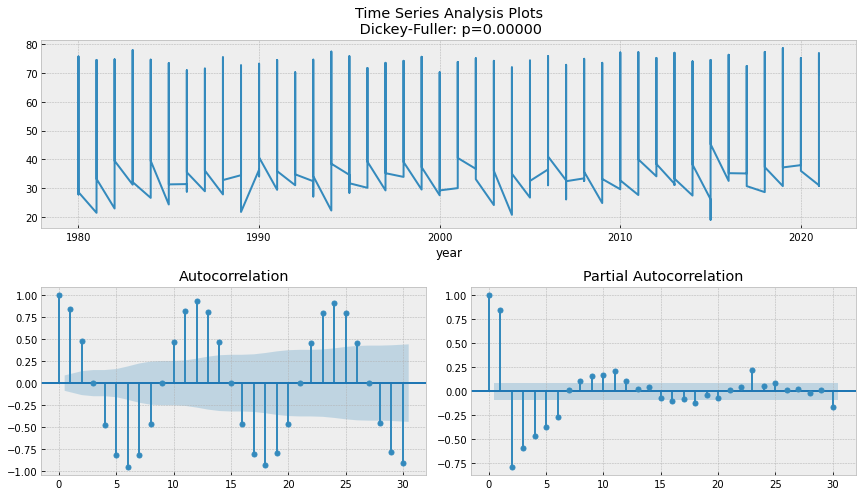

In [17]:
import statsmodels.api as sm
import statsmodels as smt



def tsplot(y, lags=None, figsize=(12, 7), syle='bmh'):

    if not isinstance(y, pd.Series):
        y = pd.Series(y)

    with plt.style.context(style='bmh'):
        fig = plt.figure(figsize=figsize)
        layout = (2,2)
        ts_ax = plt.subplot2grid(layout, (0,0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1,0))
        pacf_ax = plt.subplot2grid(layout, (1,1))

        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
#smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
#smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        smt.graphics.tsaplots.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.tsaplots.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()

tsplot(data.temp, lags=30)

Since p=0, that means our data is stationary.
Alos, looking at the autocorrelation, we see that there is clear seasonality

## Moving Averages


Moving averages ***smooth*** data by creating a single flowing line. The line represents the average p over a period of time. 


Moving averages don't predict though. They simply show what the data is doing, on average, over a period of time.





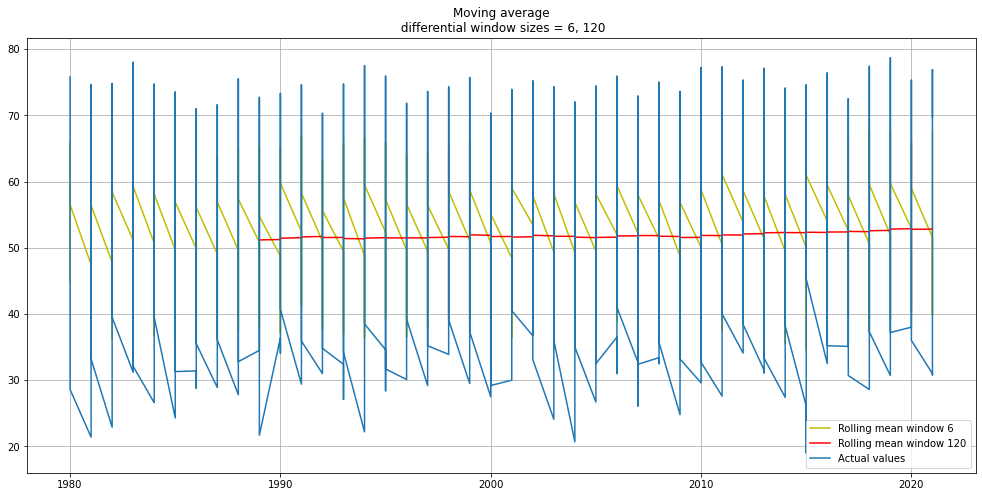

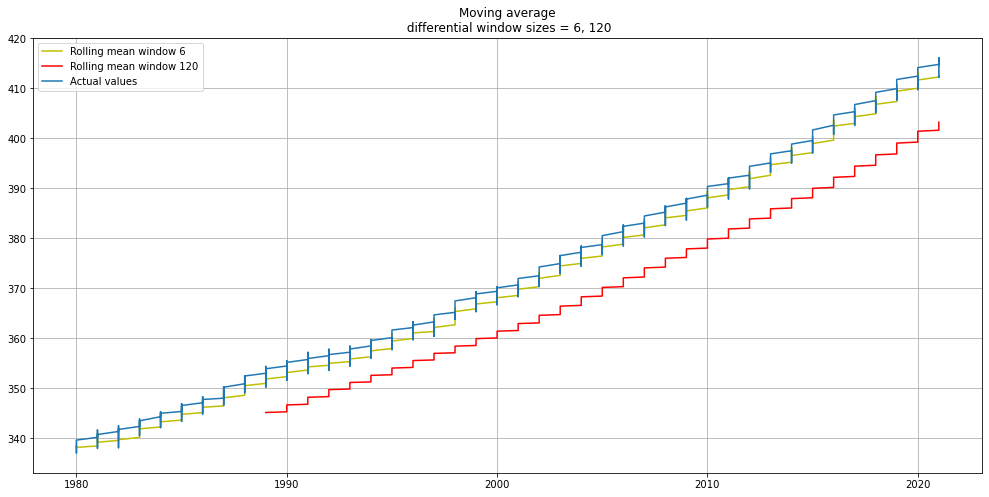

In [18]:
def plot_moving_average_differential(series, window1, window2, plot_intervals=False, scale=1.96):
    rolling_mean1 = series.rolling(window=window1).mean()
    rolling_mean2 = series.rolling(window=window2).mean()
 
    plt.figure(figsize=(17,8))
    plt.title('Moving average\n differential window sizes = ' + str(window1) + ', ' + str(window2))
    plt.plot(rolling_mean1, 'y', label='Rolling mean window ' + str(window1))
    plt.plot(rolling_mean2, 'r', label='Rolling mean window ' + str(window2))

    #Plot confidence intervals for smoothed values
    if plot_intervals:
        mae = mean_absolute_error(series[window1:], rolling_mean[window1:])
        deviation = np.std(series[window1:] - rolling_mean[window1:])
        lower_bound = rolling_mean - (mae + scale * deviation)
        upper_bound = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bound, 'r--', label='Upper bound / Lower bound')
        plt.plot(lower_bound, 'r--')

    plt.plot(series[window1:], label='Actual values')
    plt.legend(loc='best')
    plt.grid(True)
plot_moving_average_differential(data['temp'], 6, 120)
plot_moving_average_differential(data['CO2'], 6, 120)

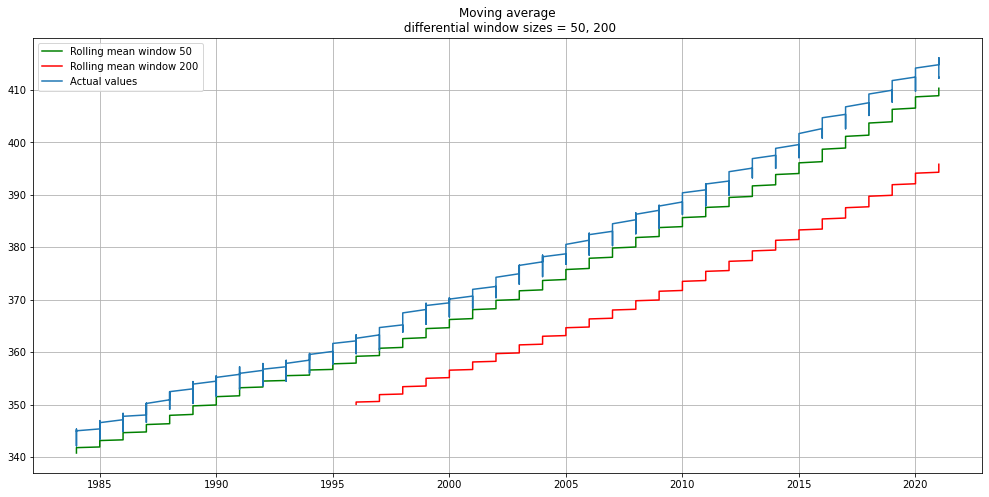

In [19]:
def plot_moving_average_differential(series, window1, window2, plot_intervals=False, scale=1.96):
    rolling_mean1 = series.rolling(window=window1).mean()
    rolling_mean2 = series.rolling(window=window2).mean()
 
    plt.figure(figsize=(17,8))
    plt.title('Moving average\n differential window sizes = ' + str(window1) + ', ' + str(window2))
    plt.plot(rolling_mean1, 'g', label='Rolling mean window ' + str(window1))
    plt.plot(rolling_mean2, 'r', label='Rolling mean window ' + str(window2))

    #Plot confidence intervals for smoothed values
    if plot_intervals:
        mae = mean_absolute_error(series[window1:], rolling_mean[window1:])
        deviation = np.std(series[window1:] - rolling_mean[window1:])
        lower_bound = rolling_mean - (mae + scale * deviation)
        upper_bound = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bound, 'r--', label='Upper bound / Lower bound')
        plt.plot(lower_bound, 'r--')

    plt.plot(series[window1:], label='Actual values')
    plt.legend(loc='best')
    plt.grid(True)

# differential 50-200
plot_moving_average_differential(data['CO2'], 50, 200)

# MOM ANALYSIS



The **method of moments** simply assigns the **empirical** (coming from the data) **mean** and **variance** to their **theoretical counterparts** (coming from the *model*, in this case the Gamma!), so that we can ***solve for the parameters*** of the Gamma!

So, for the gamma distribution, the mean and variance turn out to be (analytically derived):

<br />
<div style="font-size: 120%;">  
$$ \hat{\mu} = \bar{X} = \alpha \beta $$
$$ \hat{\sigma}^2 = S^2 = \alpha \beta^2 $$
</div>

In [20]:
co2_mean = data.mean()
co2_var = data.var()
print("Mean for CO2 :" +str(co2_mean))
print("Variance for CO2 :" +str(co2_var))

Mean for CO2 :month      6.473054
CO2      372.299421
temp      51.997006
dtype: float64
Variance for CO2 :month     11.885772
CO2      494.043541
temp     245.674091
dtype: float64


In [21]:
alpha = (co2_mean**2)/co2_var
beta = co2_var/co2_mean
alpha, beta


(month      3.525259
 CO2      280.555958
 temp      11.005184
 dtype: float64,
 month    1.836192
 CO2      1.327006
 temp     4.724774
 dtype: float64)

In [22]:
data

,month,CO2,temp
year,,,
1980,1,338.55,29.4
1980,2,339.27,27.8
1980,3,339.60,36.8
1980,4,339.99,48.7
1980,5,340.43,59.4
...,...,...,...
2021,5,416.12,61.4
2021,6,415.31,74.4
2021,7,413.55,72.4


In [23]:
mean1 = data.mean()
mean1

month      6.473054
CO2      372.299421
temp      51.997006
dtype: float64

In [24]:
var1 = data.var()
var1

month     11.885772
CO2      494.043541
temp     245.674091
dtype: float64

In [25]:
std1 = data.std()
std1

month     3.447575
CO2      22.227090
temp     15.673994
dtype: float64

In [26]:
alpha_mom = (mean1**2)/var1
beta_mom = var1/mean1
alpha_mom, beta_mom

(month      3.525259
 CO2      280.555958
 temp      11.005184
 dtype: float64,
 month    1.836192
 CO2      1.327006
 temp     4.724774
 dtype: float64)

 ## Using the gamma.pdf function in scipy.stats.distributions to plot the distributions implied by the calculated alphas and betas. 

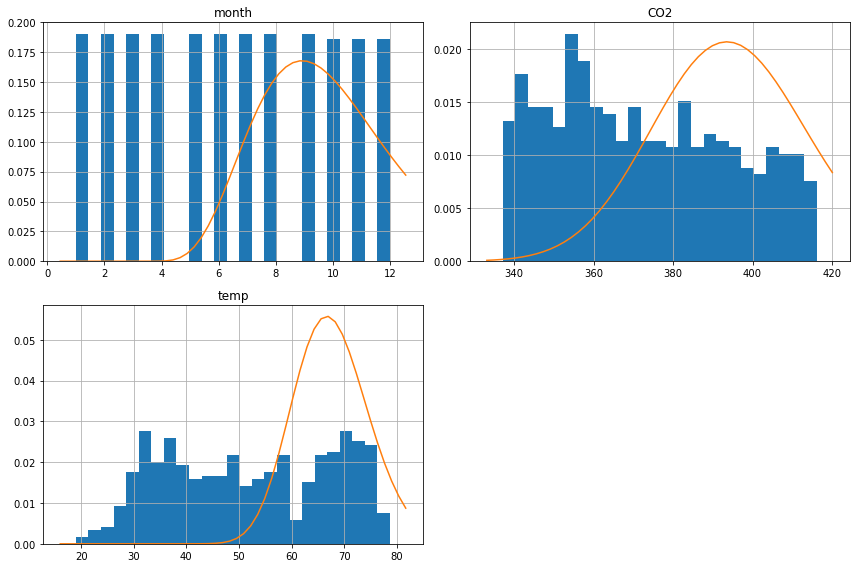

In [27]:
from scipy.stats.distributions import gamma

num_bins = 25

axs = data.hist(density = True, figsize=(12, 8), sharex = False, sharey = False, bins = num_bins, grid = True)



for ax in axs.ravel():
    m = ax.get_title()
    x = np.linspace(*ax.get_xlim())
    try:
        ax.plot(x, gamma.pdf(x, mean1[m], std1[m]))
    except KeyError:
        print('')
#ax.annotate(label, xy=(900, 0.02))

plt.tight_layout()

# Splitting the Dataset into training and testing datagroups for modelling

In [28]:
bos_df_num = data[list(data.dtypes[data.dtypes!='object'].index)]
y = bos_df_num.pop('temp')
X = bos_df_num
# x = data['CO2']
# y = data['temp']
# y = bos_df_num.pop('CO2')
# X = bos_df_num

Since we want to predict the temperature, we will take the "temp" out of the dataset and X is the dataset on which we will train the model similar for co2

In supervised machine learning, we need to give the model some data and we tell it that this will be the output for it when these are the conditions and from those features the model learns and it is able to predict values for a new value that it  has never seen before, so we need to split the data into test and train

In [29]:
train_X , test_X, train_y, test_y = train_test_split(X, y, test_size = 0.2, random_state= 4)

**Building the Model**

**Linear Regression**

In [30]:
model = LinearRegression()

In [31]:
model.fit(train_X,train_y)

LinearRegression()

In [32]:
prediction = model.predict(test_X)

In [33]:
pd.DataFrame({'actual':test_y,
             'prediction':prediction,
             'diff':(test_y-prediction)})

,actual,prediction,diff
year,,,
1985,73.5,52.591994,20.908006
1992,63.9,55.998626,7.901374
1990,47.6,47.964999,-0.364999
2003,45.9,59.680441,-13.780441
1985,45.4,59.068195,-13.668195
...,...,...,...
1993,45.6,59.296865,-13.696865
2002,33.1,61.266144,-28.166144
1987,65.4,55.857654,9.542346


In [34]:
score = model.score(test_X,test_y)
score

0.06389380036426806

**As we can see, the score for Linear Regression is 0.063 which is not a good score and the difference between actual temperature and predicted temperature is high. So we will not be using Linear Regression for it.**

**Polynomial Regression**

In [35]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=4)
X_poly= poly.fit_transform(train_X)

poly.fit(X_poly, train_y)
lin2=LinearRegression()
lin2.fit(X_poly,train_y)

LinearRegression()

In [36]:
prediction2 = lin2.predict(poly.fit_transform(test_X))
##calculating the error
np.mean((prediction2-test_y)**2)

8.948659272725859

In [37]:
pd.DataFrame({'actual':test_y,
             'prediction':prediction2,
             'diff':(test_y-prediction2)})

,actual,prediction,diff
year,,,
1985,73.5,71.973257,1.526743
1992,63.9,64.568642,-0.668642
1990,47.6,49.293185,-1.693185
2003,45.9,45.229889,0.670111
1985,45.4,44.034006,1.365994
...,...,...,...
1993,45.6,44.126312,1.473688
2002,33.1,35.596126,-2.496126
1987,65.4,64.478663,0.921337


**Similarly, we can see that the error for Polynomial regression is very high. Also, the difference in actual and predicted values is also high, So we cannot use Polynomial Regression as well.**

**Decision Tree Regressor CART**

In [38]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(train_X,train_y)

DecisionTreeRegressor(random_state=0)

In [39]:
prediction3 = regressor.predict(test_X)
np.mean((prediction3-test_y)**2)

17.814554455445545

In [40]:
pd.DataFrame({'actual':test_y,
             'prediction':prediction3,
             'diff':(test_y-prediction3)})

,actual,prediction,diff
year,,,
1985,73.5,71.0,2.5
1992,63.9,63.7,0.2
1990,47.6,45.9,1.7
2003,45.9,44.3,1.6
1985,45.4,42.3,3.1
...,...,...,...
1993,45.6,48.9,-3.3
2002,33.1,40.5,-7.4
1987,65.4,64.6,0.8


In [41]:
score3 = regressor.score(test_X,test_y)
score3

0.9273123239118604

**Here, we see that the prediction score is high i.e. 0.927, which is great, but there is still slight difference in the actual and predicted value, so we will try more models.**



**Random forest**

In [42]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=10, random_state=0, n_estimators=100)
regr.fit(train_X,train_y)

RandomForestRegressor(max_depth=10, random_state=0)

In [43]:
prediction4 = regr.predict(test_X)
np.mean((prediction4-test_y)**2)

11.708190577757597

In [44]:
pd.DataFrame({'actual':test_y,
             'prediction':prediction4,
             'diff':(test_y-prediction4)})

,actual,prediction,diff
year,,,
1985,73.5,72.775712,0.724288
1992,63.9,64.254703,-0.354703
1990,47.6,47.176961,0.423039
2003,45.9,45.797890,0.102110
1985,45.4,43.141750,2.258250
...,...,...,...
1993,45.6,48.248500,-2.648500
2002,33.1,38.145191,-5.045191
1987,65.4,64.356470,1.043530


In [45]:
regr.score(test_X,test_y)

0.9522277603729737

**We see that the score for Random Forest is the highest so far, i.e. 0.9522 and the difference between the actual and predicted values is not a lot. This is why we will choose random forest to go ahead with the prediction.**

In [46]:
data.reset_index(inplace=True)

## Let's do some forecasting and see what temperature we are going to have in the future
### Sounds interesting!!!!

In [47]:
from fbprophet import Prophet
future_temp = data[['year','temp']]
future_co2 = data[['year','CO2']]
# temp1.reset_index(inplace =  True)
temp_df = future_temp
co2_df = future_co2
temp_df.rename(mapper = {'year':'ds','temp':'y'}, axis =1, inplace=True)
temp_df
co2_df.rename(mapper = {'year':'ds','CO2':'y'}, axis =1, inplace=True)
co2_df

m=Prophet(holidays_prior_scale=0,seasonality_prior_scale=20,n_changepoints=10, weekly_seasonality=True, daily_seasonality=True)
m.fit(temp_df)
co2=Prophet(holidays_prior_scale=0,seasonality_prior_scale=20,n_changepoints=10, weekly_seasonality=True, daily_seasonality=True)
co2.fit(co2_df)

C:\Users\riaka\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [48]:
future_temp

,ds,y
0,1980,29.4
1,1980,27.8
2,1980,36.8
3,1980,48.7
4,1980,59.4
...,...,...
496,2021,61.4
497,2021,74.4
498,2021,72.4
499,2021,76.9


In [49]:
future_co2

,ds,y
0,1980,338.55
1,1980,339.27
2,1980,339.60
3,1980,339.99
4,1980,340.43
...,...,...
496,2021,416.12
497,2021,415.31
498,2021,413.55
499,2021,412.19


In [50]:
temp_df['ds'] = pd.to_datetime(temp_df['ds'],errors='coerce')
# print(train_df['ds'])
temp_df
co2_df['ds'] = pd.to_datetime(co2_df['ds'],errors='coerce')
# print(train_df['ds'])
co2_df

<ipython-input-50-7bf6aa64cb20>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['ds'] = pd.to_datetime(temp_df['ds'],errors='coerce')
<ipython-input-50-7bf6aa64cb20>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  co2_df['ds'] = pd.to_datetime(co2_df['ds'],errors='coerce')


,ds,y
0,1970-01-01 00:00:00.000001980,338.55
1,1970-01-01 00:00:00.000001980,339.27
2,1970-01-01 00:00:00.000001980,339.60
3,1970-01-01 00:00:00.000001980,339.99
4,1970-01-01 00:00:00.000001980,340.43
...,...,...
496,1970-01-01 00:00:00.000002021,416.12
497,1970-01-01 00:00:00.000002021,415.31
498,1970-01-01 00:00:00.000002021,413.55
499,1970-01-01 00:00:00.000002021,412.19


In [51]:
futuret = m.make_future_dataframe(freq = 'M',periods=720)
print(futuret.head())


                             ds
0 1970-01-01 00:00:00.000001980
1 1970-01-01 00:00:00.000001981
2 1970-01-01 00:00:00.000001982
3 1970-01-01 00:00:00.000001983
4 1970-01-01 00:00:00.000001984


In [52]:
futurec = co2.make_future_dataframe(freq = 'M',periods=720)
print(futurec.head())

                             ds
0 1970-01-01 00:00:00.000001980
1 1970-01-01 00:00:00.000001981
2 1970-01-01 00:00:00.000001982
3 1970-01-01 00:00:00.000001983
4 1970-01-01 00:00:00.000001984


In [53]:
futuret['ds'] = pd.to_datetime(futuret['ds'],errors='coerce' )
# future['ds'] =future['ds'].dt.strftime('%m-%d-%Y')
print(futuret.tail())


                               ds
757 2029-08-31 00:00:00.000002021
758 2029-09-30 00:00:00.000002021
759 2029-10-31 00:00:00.000002021
760 2029-11-30 00:00:00.000002021
761 2029-12-31 00:00:00.000002021


In [54]:
futurec['ds'] = pd.to_datetime(futurec['ds'],errors='coerce' )
# future['ds'] =future['ds'].dt.strftime('%m-%d-%Y')
print(futurec.tail())

                               ds
757 2029-08-31 00:00:00.000002021
758 2029-09-30 00:00:00.000002021
759 2029-10-31 00:00:00.000002021
760 2029-11-30 00:00:00.000002021
761 2029-12-31 00:00:00.000002021


In [55]:
forecast_temp = m.predict(futuret)
forecast_temp[['ds','yhat','yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
757,2029-08-31 00:00:00.000002021,38.715196,17.953107,58.321154
758,2029-09-30 00:00:00.000002021,37.440793,17.248824,58.000208
759,2029-10-31 00:00:00.000002021,35.865179,15.794627,56.430214
760,2029-11-30 00:00:00.000002021,37.957671,17.129437,58.571721
761,2029-12-31 00:00:00.000002021,53.427866,33.814578,73.676995


In [56]:
forecast_co2 = co2.predict(futurec)
forecast_co2[['ds','yhat','yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
757,2029-08-31 00:00:00.000002021,438.696329,435.094955,442.531620
758,2029-09-30 00:00:00.000002021,439.474912,435.618795,443.098087
759,2029-10-31 00:00:00.000002021,439.586238,435.787556,443.252736
760,2029-11-30 00:00:00.000002021,438.285620,434.714245,441.933415
761,2029-12-31 00:00:00.000002021,437.504444,433.524596,441.372842


In [57]:
from fbprophet.diagnostics import mape, cross_validation,performance_metrics
df_cv = cross_validation(m, initial='400 days', period='30 days', horizon = '30 days')
df_p = performance_metrics(df_cv)
print('Cross Validation accuracy: ', (1 - df_p['mape'].mean())*100)


INFO:fbprophet:Making 40 forecasts with cutoffs between 1981-12-02 00:00:00 and 2020-12-02 00:00:00


  0%|          | 0/40 [00:00<?, ?it/s]

Cross Validation accuracy:  69.35296827279562


In [58]:
df_co2 = cross_validation(m, initial='400 days', period='30 days', horizon = '30 days')
df_c = performance_metrics(df_co2)
print('Cross Validation accuracy: ', (1 - df_c['mape'].mean())*100)

INFO:fbprophet:Making 40 forecasts with cutoffs between 1981-12-02 00:00:00 and 2020-12-02 00:00:00


  0%|          | 0/40 [00:00<?, ?it/s]

Cross Validation accuracy:  69.35296827279562


In [60]:
metric_df = forecast_temp.set_index('ds')[['yhat']].join(temp_df.set_index('ds').y).reset_index()
metric_df.tail()


,ds,yhat,y
1216,2029-08-31 00:00:00.000002021,38.715196,NaN
1217,2029-09-30 00:00:00.000002021,37.440793,NaN
1218,2029-10-31 00:00:00.000002021,35.865179,NaN
1219,2029-11-30 00:00:00.000002021,37.957671,NaN
1220,2029-12-31 00:00:00.000002021,53.427866,NaN


In [61]:
metric_dfco2 = forecast_co2.set_index('ds')[['yhat']].join(co2_df.set_index('ds').y).reset_index()
metric_dfco2.tail()

,ds,yhat,y
1216,2029-08-31 00:00:00.000002021,438.696329,NaN
1217,2029-09-30 00:00:00.000002021,439.474912,NaN
1218,2029-10-31 00:00:00.000002021,439.586238,NaN
1219,2029-11-30 00:00:00.000002021,438.285620,NaN
1220,2029-12-31 00:00:00.000002021,437.504444,NaN


In [62]:
metric_df.isna().sum()
metric_dfco2.isna().sum()

ds        0
yhat      0
y       720
dtype: int64

In [63]:
metric_df.dropna(inplace =True)
metric_dfco2.dropna(inplace=True)

In [64]:
metric_df.tail()

,ds,yhat,y
496,1970-01-01 00:00:00.000002021,49.947663,61.4
497,1970-01-01 00:00:00.000002021,49.947663,74.4
498,1970-01-01 00:00:00.000002021,49.947663,72.4
499,1970-01-01 00:00:00.000002021,49.947663,76.9
500,1970-01-01 00:00:00.000002021,49.947663,69.7


In [65]:
metric_dfco2.tail()

,ds,yhat,y
496,1970-01-01 00:00:00.000002021,326.55646,416.12
497,1970-01-01 00:00:00.000002021,326.55646,415.31
498,1970-01-01 00:00:00.000002021,326.55646,413.55
499,1970-01-01 00:00:00.000002021,326.55646,412.19
500,1970-01-01 00:00:00.000002021,326.55646,412.40


In [69]:
from fbprophet.plot import plot_plotly, plot_components_plotly
fig = plot_plotly(m,forecast_temp,xlabel = 'Year',ylabel = 'Temperature', figsize=(1000,750))
fig.show()

In [70]:
from fbprophet.plot import plot_plotly, plot_components_plotly
fig = plot_plotly(co2,forecast_co2,xlabel = 'Year',ylabel = 'CO2', figsize=(1000,750))
fig.show()

## Voila! We have got the temperature and Carbon Dioxide gas forecast till 2030.


## And it doesnt look great
<pre><code>
If we go by the current trends, it looks like it will keep increasing..

THE TEMP HAS INCREASED around 1.8 degrees

AND CO2 HAS INCREASED around 20

SO WE HAVE TO GET OUR CO2 EMISSION BELOW THIS IN ORDER TO GET TEMP WITHIN 1.5 DEGREES

</code></pre>


If we go by the current trends, it looks like it will keep increasing..









## SO INORDER TO NOT HAVE EXTREME HOT SUMMERS

## WE HAVE GOT SOME NEW RULES LIKE DUA LIPA 

<!-- <img src="untitled folder/Unknown.jpeg" width=400 />
 -->
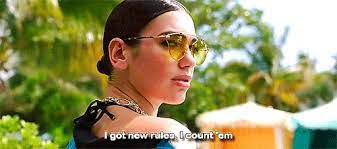


## AND YEAH SHE COUNTS THEM TOO